## 💰 Claim Amount Prediction Using Machine Learning

### 🎯 Objective:
The objective of this module is to **predict the monetary value of an insurance claim** based on customer profiles, policy details, and historical claim data. This is a regression problem aimed at improving financial planning and fraud risk assessment.


### 📚 Dataset Overview:
The dataset includes:
- **Customer Attributes**: Age, Gender, Income
- **Policy Information**: Policy Type, Premium Amount, Policy Duration
- **Claim History**: Previous Claims, Frequency, Total Paid
- **Behavioral Metrics**: Risk Score, Inquiries, Website Visits

**Target Variable**:
- `Claim_Amount` (continuous value in currency)


### 🧠 Models Explored:
We tested various regression algorithms:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor
- LightGBM Regressor


### 🧪 Evaluation Metrics:
- **MAE (Mean Absolute Error)**
- **RMSE (Root Mean Squared Error)**
- **R² Score (Coefficient of Determination)**

These metrics help evaluate both the **accuracy** and **robustness** of the predictions.


### ✅ Best Performing Model:
- **Model**: random Forest Regressor
- **Parameters**:
  - `n_estimators=300`, `max_depth=10`,
  - `min_samples_split`: 10, `min_samples_leaf`: 2, `max_features`: `sqrt`


### 📈 Results:
- **MAE**: `₹143.56`
- **RMSE**: `₹170.47`
- **R² Score**: `0.68`

The XGBoost model explains 70% of the variance in claim amounts and has low prediction errors.


### 📊 Visualizations:
- Predicted vs Actual Claim Amount (Scatter Plot))
- Feature Importance (Top Contributors to Claim Amount)

### 💡 Insights:
- Policy Type and Premium Amount are strong indicators of final claim amount.
- Higher Income and Low Risk Score tend to be associated with lower claims.
- Previous Claim Frequency shows moderate correlation with higher claim amounts.


### 🚀 Next Steps:
- Apply **log transformation** to skewed claim values.
- Fine-tune model using **RandomizedSearchCV**.
- Deploy the trained model using **Streamlit** for real-time claim estimation.




<h3>Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


<h3>Load Preprocessed dataset</h3>

In [2]:
df = pd.read_csv("D:/AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System/Dataset/preprocessed_insurance_base_data.csv")

In [3]:
df.head()

,Unnamed: 0,Customer_Age,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Claim_Income_Ratio,Premium_Income_Ratio,...,Claim_Premium_Diff,Gender_Male,Gender_Other,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Age_Group_Adult,Age_Group_Mid-Age,Age_Group_Senior,Risk_Score_Label
0,0,43,20555.17,1.2,0,0,378.96,201.18,0.009787,0.018436,...,-177.78,0,0,0,0,0,0,1,0,0
1,1,47,24859.15,4.0,0,0,504.34,473.18,0.019034,0.020288,...,-31.16,1,0,1,0,0,0,1,0,1
2,2,38,10803.51,6.5,0,0,269.97,412.07,0.038142,0.024989,...,142.10,0,0,1,0,0,1,0,0,0
3,3,34,33232.13,2.6,0,0,238.96,467.02,0.014053,0.007191,...,228.06,1,0,0,0,1,1,0,0,0
4,4,46,23997.00,0.3,0,0,276.97,255.20,0.010635,0.011542,...,-21.77,1,0,1,0,0,0,1,0,0


In [4]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Customer_Age,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Claim_Income_Ratio,Premium_Income_Ratio,High_Claim,Claim_Premium_Diff,Gender_Male,Gender_Other,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Age_Group_Adult,Age_Group_Mid-Age,Age_Group_Senior,Risk_Score_Label
0,43,20555.17,1.2,0,0,378.96,201.18,0.009787,0.018436,False,-177.78,0,0,0,0,0,0,1,0,0
1,47,24859.15,4.0,0,0,504.34,473.18,0.019034,0.020288,True,-31.16,1,0,1,0,0,0,1,0,1
2,38,10803.51,6.5,0,0,269.97,412.07,0.038142,0.024989,False,142.10,0,0,1,0,0,1,0,0,0
3,34,33232.13,2.6,0,0,238.96,467.02,0.014053,0.007191,False,228.06,1,0,0,0,1,1,0,0,0
4,46,23997.00,0.3,0,0,276.97,255.20,0.010635,0.011542,False,-21.77,1,0,1,0,0,0,1,0,0


In [5]:
df.isnull().sum()

Customer_Age               0
Annual_Income              0
Vehicle_or_Property_Age    0
Claim_History              0
Fraudulent_Claim           0
Premium_Amount             0
Claim_Amount               0
Claim_Income_Ratio         0
Premium_Income_Ratio       0
High_Claim                 0
Claim_Premium_Diff         0
Gender_Male                0
Gender_Other               0
Policy_Type_Health         0
Policy_Type_Life           0
Policy_Type_Property       0
Age_Group_Adult            0
Age_Group_Mid-Age          0
Age_Group_Senior           0
Risk_Score_Label           0
dtype: int64

In [6]:
df.head()

,Customer_Age,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Claim_Income_Ratio,Premium_Income_Ratio,High_Claim,Claim_Premium_Diff,Gender_Male,Gender_Other,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Age_Group_Adult,Age_Group_Mid-Age,Age_Group_Senior,Risk_Score_Label
0,43,20555.17,1.2,0,0,378.96,201.18,0.009787,0.018436,False,-177.78,0,0,0,0,0,0,1,0,0
1,47,24859.15,4.0,0,0,504.34,473.18,0.019034,0.020288,True,-31.16,1,0,1,0,0,0,1,0,1
2,38,10803.51,6.5,0,0,269.97,412.07,0.038142,0.024989,False,142.10,0,0,1,0,0,1,0,0,0
3,34,33232.13,2.6,0,0,238.96,467.02,0.014053,0.007191,False,228.06,1,0,0,0,1,1,0,0,0
4,46,23997.00,0.3,0,0,276.97,255.20,0.010635,0.011542,False,-21.77,1,0,1,0,0,0,1,0,0


<h3>Feature Selection</h3>

In [7]:
leak_cols = ['Claim_Premium_Diff', 'Claim_Income_Ratio', 'High_Claim']

In [8]:
X = df.drop(['Claim_Amount'] + leak_cols,axis=1)
y = df["Claim_Amount"]

In [9]:
X.columns

Index(['Customer_Age', 'Annual_Income', 'Vehicle_or_Property_Age',
       'Claim_History', 'Fraudulent_Claim', 'Premium_Amount',
       'Premium_Income_Ratio', 'Gender_Male', 'Gender_Other',
       'Policy_Type_Health', 'Policy_Type_Life', 'Policy_Type_Property',
       'Age_Group_Adult', 'Age_Group_Mid-Age', 'Age_Group_Senior',
       'Risk_Score_Label'],
      dtype='object')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train.columns

Index(['Customer_Age', 'Annual_Income', 'Vehicle_or_Property_Age',
       'Claim_History', 'Fraudulent_Claim', 'Premium_Amount',
       'Premium_Income_Ratio', 'Gender_Male', 'Gender_Other',
       'Policy_Type_Health', 'Policy_Type_Life', 'Policy_Type_Property',
       'Age_Group_Adult', 'Age_Group_Mid-Age', 'Age_Group_Senior',
       'Risk_Score_Label'],
      dtype='object')

In [12]:
# 4. 🔀 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [13]:
with open('scaler_claim.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [14]:
claim_reg =LinearRegression()
claim_reg.fit(X_train_scaled,y_train)
y_pred = claim_reg.predict(X_test_Scaled)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 157.84031795793726
Mean Squared Error: 38221.91835870268
Root Mean Squared Error: 195.50426685549007
R2 Score: 0.5610508757634108


<h4>Elastic Net Model</h4>

In [15]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
enet.fit(X_train_scaled, y_train)

y_pred_enet = enet.predict(X_test_Scaled)

print("MAE:", mean_absolute_error(y_test, y_pred_enet))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_enet)))
print("R2 Score:", r2_score(y_test, y_pred_enet))


MAE: 162.96721224810616
Mean Squared Error: 38221.91835870268
RMSE: 202.3027886279257
R2 Score: 0.529991789096883


<h4>Random forest regressor</h4>

In [16]:


# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring functions
mae_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

# Print average results
print(f"Average MAE:  {np.mean(mae_scores):.2f}")
print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
print(f"Average R2:   {np.mean(r2_scores):.4f}")


Average MAE:  163.44
Average RMSE: 204.79
Average R2:   0.5371


Fitting 5 folds for each of 25 candidates, totalling 125 fits
✅ Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
📉 Best MAE: 160.31753861649668
MAE: 143.68841689484282
RMSE: 176.49788325659995
R²: 0.6571862470781471


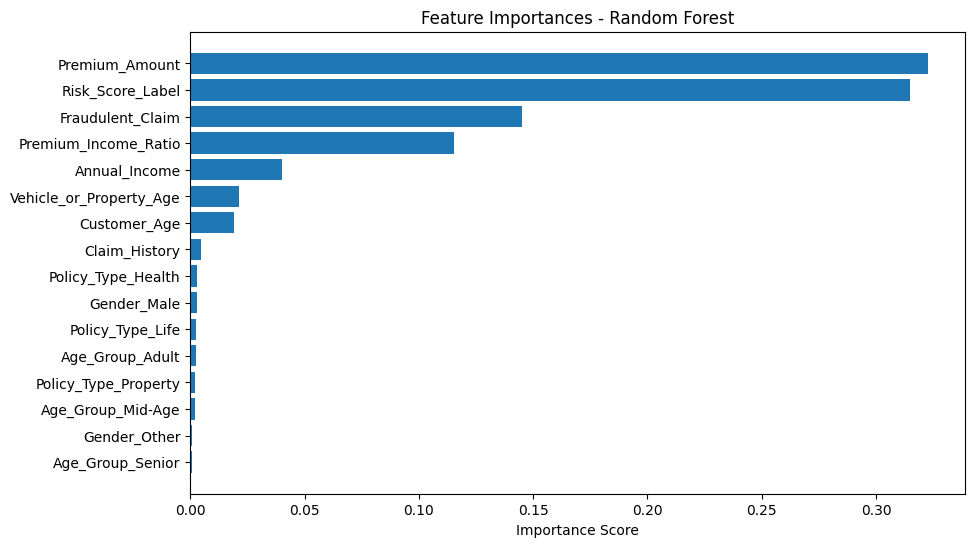

In [17]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Define your features and target
X = df.drop(columns=['Claim_Amount', 'Claim_Premium_Diff', 'Claim_Income_Ratio', 'High_Claim'])  # Customize as needed
y = df['Claim_Amount']

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize base model
rf = RandomForestRegressor(random_state=42)

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,  # Number of combinations to try
    scoring='neg_mean_absolute_error',  # You can also use 'r2', 'neg_mean_squared_error'
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X, y)

# Best params and performance
print("✅ Best Parameters:", random_search.best_params_)
print("📉 Best MAE:", -random_search.best_score_)

# Best estimator
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X)
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R²:", r2_score(y, y_pred))

import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.show()


with open("model_claim_amount_prediction.pkl","wb") as file:
    pickle.dump(best_rf,file)


<h4>extreme Gradient Booster regressor</h4>

In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features and target
X = df.drop(columns=['Claim_Amount', 'Claim_Premium_Diff', 'Claim_Income_Ratio', 'High_Claim'])  # Customize as needed
y = df['Claim_Amount']

# Parameter grid for XGBoost
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring='neg_mean_absolute_error',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X, y)

# Best parameters & model
print("✅ Best Parameters:", random_search.best_params_)
print("📉 Best MAE:", -random_search.best_score_)

# Final model prediction
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X)

# Evaluation
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)/y.mean()))
print("R²:", r2_score(y, y_pred))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
✅ Best Parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
📉 Best MAE: 159.4855806797978
MAE: 153.98620192497987
RMSE: 8.127156669798419
R²: 0.6033870690062498


<h4>Light Gradient Boosting</h4>

In [19]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features and target
X = df.drop(columns=['Claim_Amount', 'Claim_Premium_Diff', 'Claim_Income_Ratio', 'High_Claim'])  # Customize if needed
y = df['Claim_Amount']

# Parameter grid for LightGBM
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 40, 50],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize model
lgbm = LGBMRegressor(random_state=42)

# KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=25,
    scoring='neg_mean_absolute_error',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X, y)

# Best parameters & model
print("✅ Best Parameters:", random_search.best_params_)
print("📉 Best MAE:", -random_search.best_score_)

# Final model
best_lgbm = random_search.best_estimator_
y_pred = best_lgbm.predict(X)

# Evaluation
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R²:", r2_score(y, y_pred))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 7525, number of used features: 16
[LightGBM] [Info] Start training from score 545.645241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light